In [11]:
import numpy as np
import pandas as pd
import time
from scipy.optimize import linprog
from scipy import misc
import sys
from unittest import *
import os
import numpy as np
import unittest

import matplotlib.pylab as plt
%matplotlib inline

## nash function impl

In [12]:
def nash_equilibrium_points(A, min_threshold):
    nash = np.zeros((A.shape))
    for i in range(A.shape[0]):
        for idx in np.argwhere(A[i] == np.min(A[i])):
            nash[i][idx] += 1
            
    for i in range(A.shape[1]):
        for idx in np.argwhere(A[:, i] == np.max(A[:, i]))[0]:
            nash[idx][i] += 1

    points_vals = [[i, j] for i in range(nash.shape[0]) for j in range(nash.shape[1]) if nash[i][j] == 2]

    if not len(points_vals):
        print 'no points'
        return None
    else:
        for point in points_vals:
            print('value', A[point[0]][point[1]] - min_threshold, 'First strategy', point[0] + 1, \
               'Second strategy', point[1] + 1)
        return points_vals
    return 0

In [32]:
def nash_equilibrium(A):
    print np.min(A)
    min_threshold = np.abs(np.min(A)) + 1
    A += min_threshold

    points = nash_equilibrium_points(A, min_threshold)
    if points and len(points) == 1:
        first = np.zeros(A.shape[0])
        second = np.zeros(A.shape[1])
        first[points[0][0]] = 1
        second[points[0][1]] = 1
        return first, second, A[points[0][0]][points[0][1]] - min_threshold
    print 'all finish'
    
    b, w = np.ones(A.shape[0]), -np.ones(A.shape[1])
    res_first = linprog(w, A_ub = A, b_ub = b, options = {"disp": False})
    b, w = -np.ones(A.shape[1]), np.ones(A.shape[0])
    res_second = linprog(w, A_ub = -A.T, b_ub = b, options = {"disp": False})

    game_value = np.sum(res_second.get("x"))
    
    return res_first.get("x") / game_value, res_second.get("x") / game_value, (1 / game_value) - min_threshold


## Draw function

In [33]:
def draw(p, q):
    x1, x2 = np.arange(p.shape[0]), np.arange(q.shape[0])
    for pair in zip([x1, x2], [p, q]):
        plt.figure(figsize=(8,6), dpi = 80)
        plt.ylabel('strategy selection probability')
        plt.xlabel('strategy number')
        plt.grid(True)
        plt.scatter(pair[0], pair[1], color='blue')
        map(lambda x, y: plt.plot([x, x], [0.0, y], color = 'blue'), pair[0], pair[1])
        plt.show()

## unit tests

In [47]:
class UnitTest(unittest.TestCase):
 
    def runTest(self):
        pass
 
    def test_number1(self):
        A = np.array([[8, 4, 7], [6, 5, 9], [7, 7, 8]])
        p = np.array([0, 0, 1], dtype=np.float)
        q = np.array([0, 1, 0], dtype=np.float)
        val = 7
        a, b, c = nash_equilibrium(A)
        self.assertEqual(a.tolist(), p.tolist())
        self.assertEqual(b.tolist(), q.tolist())
        self.assertEqual(c, val)
 
    def test_number2(self):
        A = np.array([[-1, 1], [1, -1]])
        p = np.array([0.5, 0.5])
        q = np.array([0.5, 0.5])
        val = 0
        a, b, c = nash_equilibrium(A)
        assert(np.sum(np.abs(a - p)) < 0.001 )
        assert(np.sum(np.abs(b - q)) < 0.001 )
        self.assertEqual(c, val)
        
    def test_number3(self):
        A = np.array([[2, 5], [6, 4]])
        q = np.array([0.4, 0.6])
        p = np.array([0.2, 0.8])
        val = 4.4
        a, b, c = nash_equilibrium(A)
        print c
        assert(np.sum(np.abs(a - p)) < 0.001 )
        assert(np.sum(np.abs(b - q)) < 0.001 )
        assert(np.abs(val - c) < 0.001)
        
    def test_number4(self):
        A = np.array([[-1, -2, 3.], [2, 4, 1]])
        p = np.array([2/5., 0, 3./5])
        q = np.array([1/5., 4./5])
        val = 7 / 5.
        a, b, c = nash_equilibrium(A)
        assert(np.sum(np.abs(a - p)) < 0.001 )
        assert(np.sum(np.abs(b - q)) < 0.001 )
        assert(np.abs(val - c) < 0.001)
    
    def test_number5(self):
        A = np.array([[0, 3, 4.], [2, 1, -3.]])
        p = np.array([7/9., 0, 2/9.])
        q = np.array([5./9., 4./9])
        val = 8 / 9.
        a, b, c = nash_equilibrium(A)
        assert(np.sum(np.abs(a - p)) < 0.001 )
        assert(np.sum(np.abs(b - q)) < 0.001 )
        assert(np.abs(val - c) < 0.001)
        

In [48]:
tests = UnitTest()
suite = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(suite)

.....

4
('value', 7, 'First strategy', 3, 'Second strategy', 2)
-1
no points
all finish
2
no points
all finish
4.4
-2.0
no points
all finish
-3.0
no points
all finish



----------------------------------------------------------------------
Ran 5 tests in 0.025s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>

## Read matrix and execute function

Matrix shapes are:
x = 2 
y = 3 

13
8
36


27
35
35


8
('value', 27, 'First strategy', 2, 'Second strategy', 1)
First player strategy  [ 0.  1.]
Second player strategy [ 1.  0.  0.]
Game value is 27


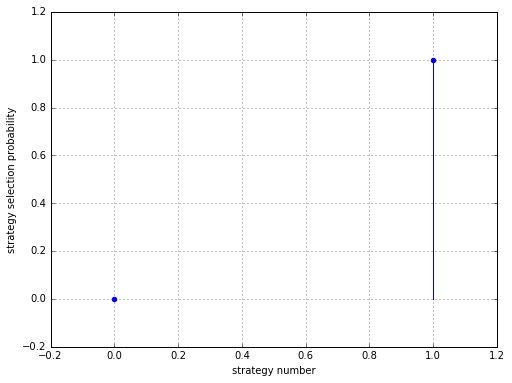

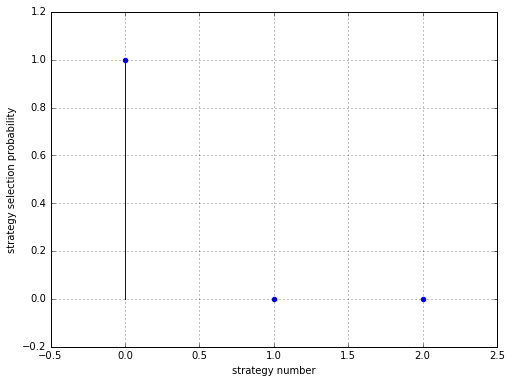

In [49]:
#Random input
#'''
x = 2
y = 3
A = np.random.randint(-15,41, (x,y))
#'''
#Keyboard input
'''
A = np.array([[-17, 0 , 1],
          	[1, 36, 10],
          	[0, 1, 2]]);
'''
#One point of Nash equilibrium
'''
A = np.array([[1, 2, 3, -4, 5, 6],
          	[5, -1, 2, -3, -2, 4],
          	[2, 1, 3, 1, 2, 1],
          	[-1, 2, 1, 1, 2, 4]])
'''
#Incomplete range of strategies
'''
A = np.array([[10, 8, 12],
          	[8, 10, 10],
          	[9, 9, 8]])  
'''
#Complete range of strategies
'''
A = np.array([[2, 0 , 1],
          	[1, 2, 0],
          	[0, 1, 2]]);
'''
x = A.shape[0]
y = A.shape[1]
print 'Matrix shapes are:\nx =',x, '\ny =', y,'\n'
for i in range(x):
    for j in range(y):
        print A[i][j]
    print '\n'

p, q, v = nash_equilibrium(A)
print 'First player strategy ', p
print 'Second player strategy',q
print 'Game value is', v
draw(p, q)